In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models, layers, utils, backend as K
from keras.callbacks import ModelCheckpoint

# Visualização e tratamento dos dados

In [74]:
# Inicializar DataFrame
pd.options.display.max_columns = df.shape[1]
df = pd.read_csv('melb_data.csv')

# Visualizar DataFrame
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,...,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,...,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,...,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,...,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,...,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,...,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,...,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,...,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,...,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [75]:
# Visualizar tamanho do DataFrame
df.shape

(13580, 21)

In [76]:
# Setar máximo de colunas para a visualização do DataFrame
pd.options.display.max_columns = df.shape[1]

# Imprimir todas as colunas com o método describe
df.describe(include="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,36 Aberfeldie St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


## Tratamento dos dados faltantes

In [77]:
# Imprimir dados faltantes
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [78]:
# Substituir valores nulos por zero na coluna 'Car'
df['Car'].fillna(0, inplace=True)

# Dropar colunas pouco relevantes
df.drop('BuildingArea', axis='columns', inplace=True)
df.drop('YearBuilt', axis='columns', inplace=True)
df.drop('CouncilArea', axis='columns', inplace=True)

## Remoção de atributos irrelevantes

In [79]:
# Dropar demais colunas sem relevância
df.drop('SellerG', axis='columns', inplace=True)
df.drop('Date', axis='columns', inplace=True)
df.drop('Method', axis='columns', inplace=True)
df.drop('Address', axis='columns', inplace=True)

## Tratamento dos dados não numéricos

In [80]:
# Imprimir tipo de dado de cada coluna
df.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [81]:
# Calcular o valor médio do imóvel para cada bairro
mean_prices_by_suburb = df.groupby('Suburb')['Price'].transform('mean')
# Calcular o valor médio do imóvel para cada região
mean_prices_by_regionname = df.groupby('Regionname')['Price'].transform('mean')

# Criar nova coluna com o valor médio do imóvel para o bairro do registro
df['Suburb_Mean_Price'] = mean_prices_by_suburb
# Criar nova coluna com o valor médio do imóvel para a região do registro
df['RegionName_Mean_Price'] = mean_prices_by_regionname

# Dropar coluna Suburb
df.drop('Suburb', axis='columns', inplace=True)
# Dropar coluna Regionname
df.drop('Regionname', axis='columns', inplace=True)

# Imprimir DataFrame
df

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb_Mean_Price,RegionName_Mean_Price
0,2,h,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,4019.0,1.060366e+06,898171.082262
1,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,4019.0,1.060366e+06,898171.082262
2,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,4019.0,1.060366e+06,898171.082262
3,3,h,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,4019.0,1.060366e+06,898171.082262
4,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,4019.0,1.060366e+06,898171.082262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,h,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,7392.0,1.251488e+06,922943.784444
13576,3,h,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,6380.0,1.312481e+06,866420.520014
13577,3,h,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,6380.0,1.312481e+06,866420.520014
13578,4,h,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,6380.0,1.312481e+06,866420.520014


In [82]:
# Criar colunas binárias para cada categoria de 'Type'
df_dummies = pd.get_dummies(df['Type'], prefix='Type')
df_dummies = df_dummies.astype(int)

# Concatenar o DataFrame original com as colunas binárias
df = pd.concat([df, df_dummies], axis=1)
df.drop('Type', axis='columns', inplace=True)

# Imprimir DataFrame
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb_Mean_Price,RegionName_Mean_Price,Type_h,Type_t,Type_u
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,4019.0,1.060366e+06,898171.082262,1,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,4019.0,1.060366e+06,898171.082262,1,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,4019.0,1.060366e+06,898171.082262,1,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,4019.0,1.060366e+06,898171.082262,1,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,4019.0,1.060366e+06,898171.082262,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,7392.0,1.251488e+06,922943.784444,1,0,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,6380.0,1.312481e+06,866420.520014,1,0,0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,6380.0,1.312481e+06,866420.520014,1,0,0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,6380.0,1.312481e+06,866420.520014,1,0,0


## Remoção dos outliers

<Axes: xlabel='Price'>

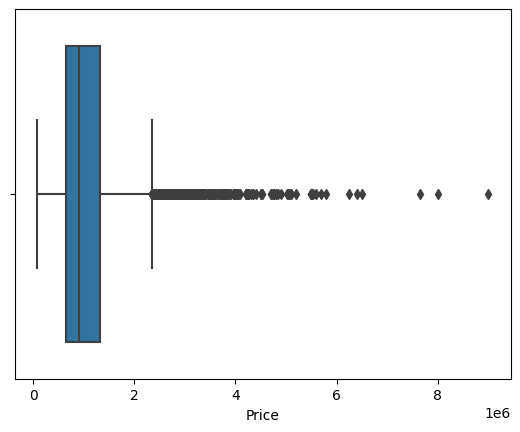

In [83]:
# Plotar boxplot para análise dos outliers da coluna 'Price'
sns.boxplot(x=df["Price"])

In [84]:
# Remover outliers
df = df[df['Price'] <= 2100000]

## Mapa de calor

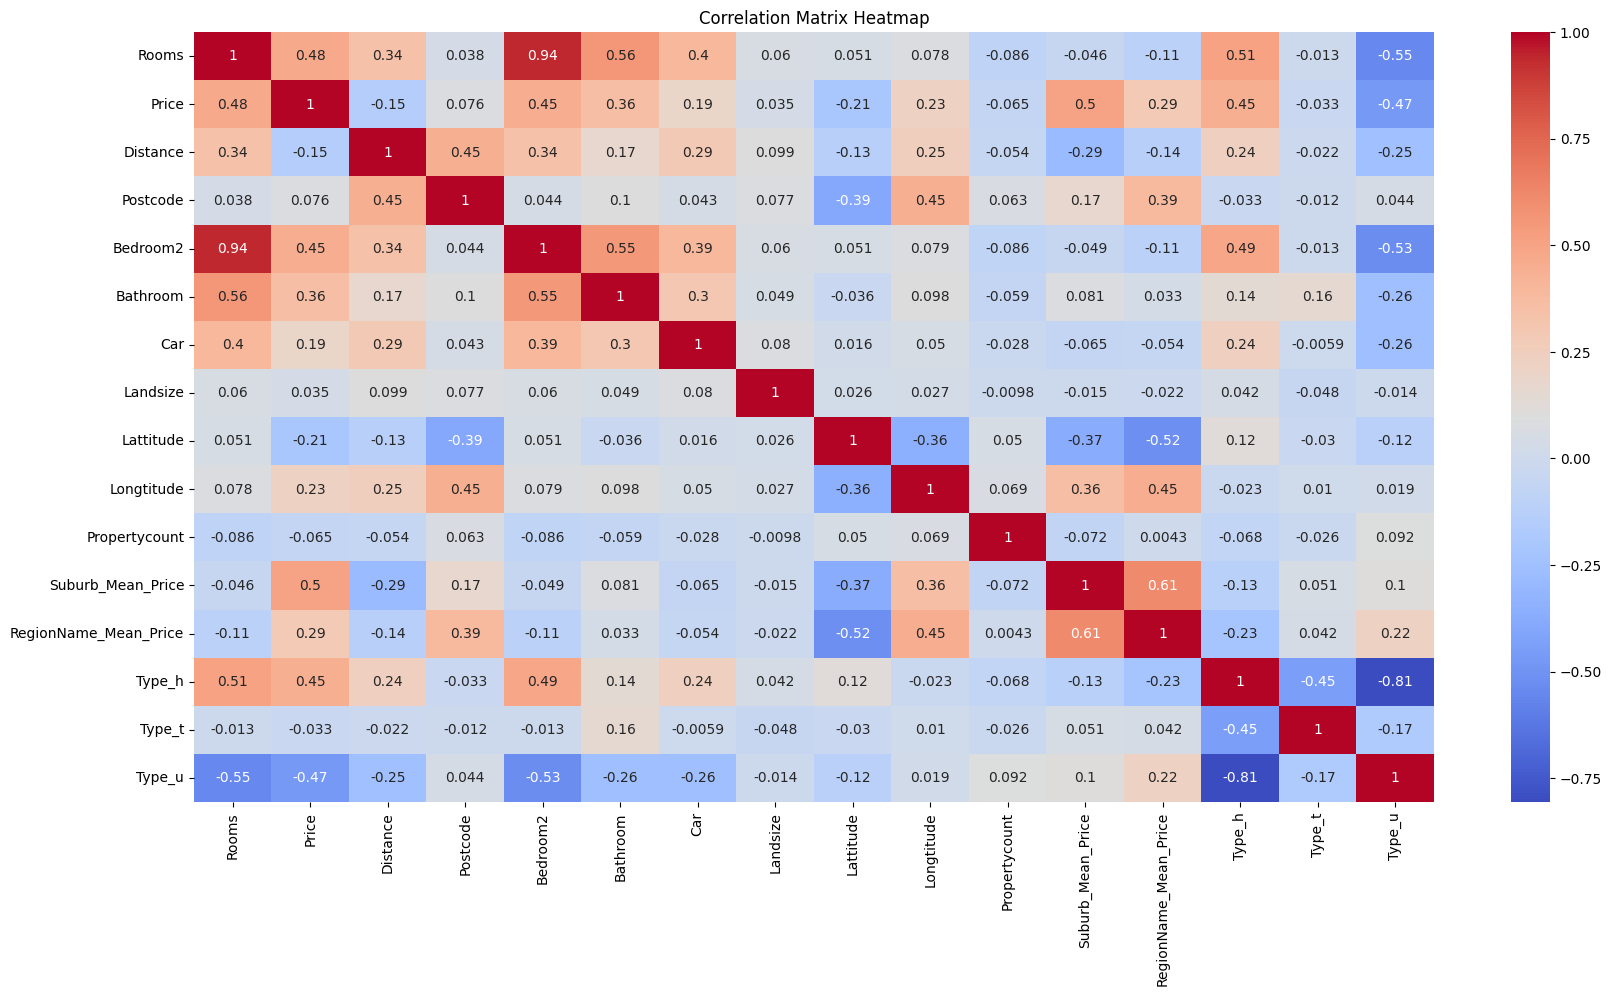

In [85]:
# Criar matriz de correlação
corr_matrix = df.corr()

# Plotar mapa de calor
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Separação dos dados em X e Y

In [86]:
X = df.drop('Price', axis=1)
y = df[['Price']]

## Normalização dos dados

In [87]:
# Imprimir dados antes da normalização
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb_Mean_Price,RegionName_Mean_Price,Type_h,Type_t,Type_u
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,4019.0,1.060366e+06,898171.082262,1,0,0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,4019.0,1.060366e+06,898171.082262,1,0,0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,4019.0,1.060366e+06,898171.082262,1,0,0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,4019.0,1.060366e+06,898171.082262,1,0,0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,4019.0,1.060366e+06,898171.082262,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,3,16.5,3049.0,3.0,2.0,2.0,256.0,-37.67917,144.89390,2474.0,6.218571e+05,898171.082262,1,0,0
13575,4,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,7392.0,1.251488e+06,922943.784444,1,0,0
13576,3,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,6380.0,1.312481e+06,866420.520014,1,0,0
13577,3,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,6380.0,1.312481e+06,866420.520014,1,0,0


In [88]:
# Normalizar dados
X = MinMaxScaler().fit_transform(X.values)

# Imprimir dados após a normalização
X

array([[0.11111111, 0.05197505, 0.06857728, ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.05197505, 0.06857728, ..., 1.        , 0.        ,
        0.        ],
       [0.22222222, 0.05197505, 0.06857728, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.22222222, 0.14137214, 0.01637666, ..., 1.        , 0.        ,
        0.        ],
       [0.22222222, 0.14137214, 0.01637666, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.13097713, 0.01330604, ..., 1.        , 0.        ,
        0.        ]])

# Construção da estrutura da rede neural perceptron multicamadas

## Inicialização do modelo e definição das camadas

In [99]:
# Inicializar modelo
model = tf.keras.models.Sequential()

# Adicionar a primeira camada oculta
model.add( tf.keras.layers.Dense(input_dim = X.shape[1], units = 30, activation = 'relu', kernel_initializer = 'normal'))

# Adicionar a segunda camada oculta
model.add( tf.keras.layers.Dense(units = 30, activation = 'relu', kernel_initializer = 'normal'))

# Adicionar a terceira camada oculta
model.add( tf.keras.layers.Dense(units = 30, activation = 'relu', kernel_initializer = 'normal'))

# Adicionar a camada de saída
model.add( tf.keras.layers.Dense(units = 1, activation = 'linear', kernel_initializer = 'normal'))

## Visualização da estrutura da rede

In [657]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

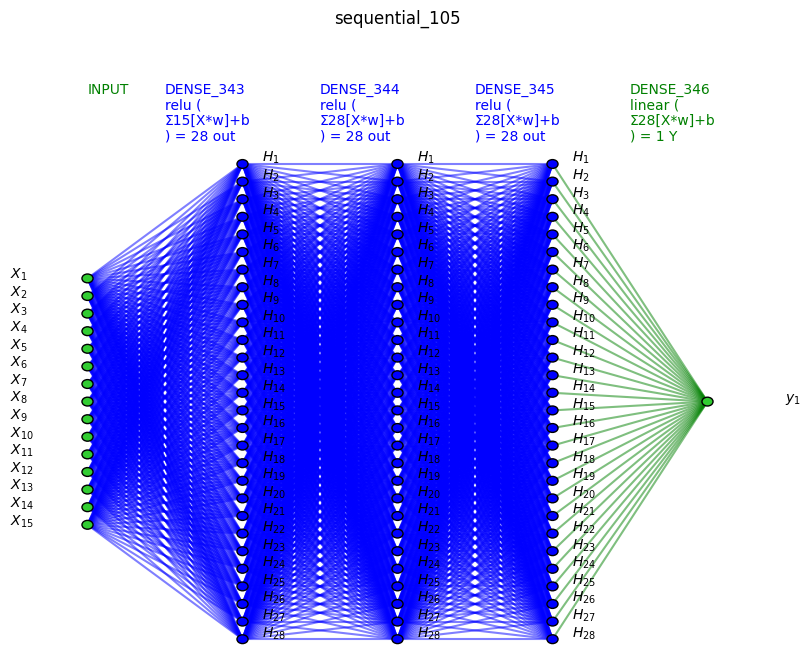

In [703]:
# Imprimir estrutura da rede
visualize_nn(model, description=True, figsize=(10,8))

## Definição das métricas de avaliação

In [100]:
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat))
    ss_tot = K.sum(K.square(y - K.mean(y)))
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

def DR(y, y_hat):
  return (abs(y-y_hat)/y)

## Definição do otimizador

In [101]:
# Criar o modelo e o otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3)

## Compilação do modelo

In [102]:
# Compilando a Rede
model.compile(optimizer, loss = 'mean_absolute_error', metrics = [DR, R2])

# Treinamento do modelo

In [ ]:
y = y.to_numpy()

In [103]:
training = model.fit(X,
                     y,
                     batch_size = 32,
                     epochs = 250,
                     shuffle=True,
                     validation_split=0.2,
                     verbose=1)

Epoch 1/250
318/318 [==============================] - 1s 1ms/step - loss: 231247.9688 - DR: 0.2674 - R2: 0.3748 - val_loss: 199502.4062 - val_DR: 0.1996 - val_R2: 0.5178
Epoch 2/250
318/318 [==============================] - 0s 895us/step - loss: 178763.1562 - DR: 0.2006 - R2: 0.6508 - val_loss: 186627.6406 - val_DR: 0.2185 - val_R2: 0.5797
Epoch 3/250
318/318 [==============================] - 0s 879us/step - loss: 175325.2500 - DR: 0.1967 - R2: 0.6646 - val_loss: 157925.2031 - val_DR: 0.1676 - val_R2: 0.6843
Epoch 4/250
318/318 [==============================] - 0s 876us/step - loss: 178127.0156 - DR: 0.1988 - R2: 0.6486 - val_loss: 190080.3594 - val_DR: 0.2227 - val_R2: 0.5614
Epoch 5/250
318/318 [==============================] - 0s 880us/step - loss: 177449.7812 - DR: 0.1980 - R2: 0.6519 - val_loss: 161191.4531 - val_DR: 0.1682 - val_R2: 0.6721
Epoch 6/250
318/318 [==============================] - 0s 920us/step - loss: 177789.1719 - DR: 0.1978 - R2: 0.6580 - val_loss: 159237.171

# Validação do modelo

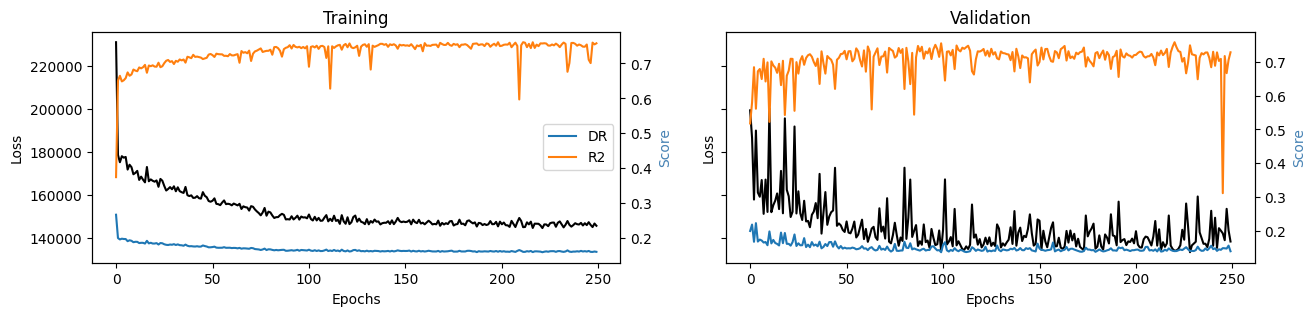

In [104]:
# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
  ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
  ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")

plt.show()

In [106]:
model.evaluate(X, y)

397/397 [==============================] - 0s 665us/step - loss: 141732.1094 - DR: 0.1522 - R2: 0.6929


[141732.109375, 0.1522023230791092, 0.6928671002388]